In [2]:
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras import metrics
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras import backend as K

import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

/home/donghi/anaconda3/envs/ambDanielFiep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/donghi/anaconda3/envs/ambDanielFiep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/donghi/anaconda3/envs/ambDanielFiep/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/donghi/anaconda3/en

In [3]:
np.random.seed(123)

! wget -c https://github.com/raphaelmcobe/jet-classification/raw/master/signal_PU0_13TeV_MJ-65-95_PTJ-250-300_ext.txt
!wget -c https://github.com/raphaelmcobe/jet-classification/raw/master/background_PU0_13TeV_MJ-65-95_PTJ-250-300_ext.txt
!ls -lh

--2020-02-20 16:28:36--  https://github.com/raphaelmcobe/jet-classification/raw/master/signal_PU0_13TeV_MJ-65-95_PTJ-250-300_ext.txt
Resolving github.com (github.com)... 18.228.52.138
Connecting to github.com (github.com)|18.228.52.138|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/raphaelmcobe/jet-classification/master/signal_PU0_13TeV_MJ-65-95_PTJ-250-300_ext.txt [following]
--2020-02-20 16:28:36--  https://raw.githubusercontent.com/raphaelmcobe/jet-classification/master/signal_PU0_13TeV_MJ-65-95_PTJ-250-300_ext.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.92.133
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.92.133|:443... connected.
HTTP request sent, awaiting response... 416 Range Not Satisfiable

    The file is already fully retrieved; nothing to do.

--2020-02-20 16:28:37--  https://github.com/raphaelmcobe/jet-classification/raw/master/background_PU0_

# Rede Neural KERAS - DEEP LEARNING

In [4]:
def print_heatmap(data):
    heatmap = sns.heatmap(data)
    heatmap.set(xlabel='Pseudorapidity', ylabel='Azimuthal Angle')
    print(heatmap)
    #plt.imshow(data, cmap='jet', interpolation='nearest')
    #plt.show()

In [5]:
def get_predicted_values(output_values):
    predicted_values = []
    for probability in output_values:
        if probability[0] > probability[1]:
            predicted_values.append(0)
        else:
            predicted_values.append(1)
    return predicted_values

In [6]:
signal_data = pd.read_table('signal_PU0_13TeV_MJ-65-95_PTJ-250-300_ext.txt', header=None)
print(signal_data.shape)
print(signal_data.iloc[1:10,625])

(11298, 626)
1   NaN
2   NaN
3   NaN
4   NaN
5   NaN
6   NaN
7   NaN
8   NaN
9   NaN
Name: 625, dtype: float64


In [7]:
signal_data.drop(625, axis=1, inplace=True)
print(signal_data.shape)

(11298, 625)


In [8]:
mean_signal = signal_data.mean()
print(mean_signal.iloc[1:10,])

1    0.000000e+00
2    0.000000e+00
3    0.000000e+00
4    0.000000e+00
5    2.397279e-08
6    0.000000e+00
7    6.124087e-08
8    0.000000e+00
9    3.770772e-06
dtype: float64


(625,)
AxesSubplot(0.125,0.125;0.62x0.755)


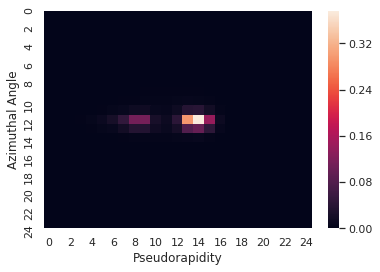

In [9]:
mean_signal_matrix = mean_signal.values
print(mean_signal_matrix.shape)
mean_signal_matrix = mean_signal_matrix.reshape((25,25))

print_heatmap(mean_signal_matrix)

In [10]:
signal_data[625] = 1

In [11]:
signal_data.iloc[0:10,625]

0    1
1    1
2    1
3    1
4    1
5    1
6    1
7    1
8    1
9    1
Name: 625, dtype: int64

In [12]:
backgroud_data = pd.read_table('background_PU0_13TeV_MJ-65-95_PTJ-250-300_ext.txt', header=None, dtype=np.float32)
print(backgroud_data.shape)

(11298, 626)


In [13]:
backgroud_data.drop(625, axis=1, inplace=True)
print(backgroud_data.shape)

(11298, 625)


In [14]:
mean_background = backgroud_data.mean()
print(mean_background.iloc[1:10,])

1    0.000000e+00
2    0.000000e+00
3    8.339239e-08
4    0.000000e+00
5    1.226879e-06
6    9.698673e-07
7    3.696426e-06
8    8.896710e-06
9    5.325904e-06
dtype: float32


(625,)
AxesSubplot(0.125,0.125;0.62x0.755)


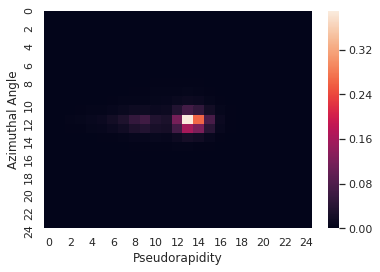

In [15]:
mean_background_matrix = mean_background.values
print(mean_background_matrix.shape)
mean_background_matrix = mean_background_matrix.reshape((25,25))

print_heatmap(mean_background_matrix)

In [16]:
backgroud_data[625] = 0

In [17]:
backgroud_data.iloc[0:10,625]

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: 625, dtype: int64

In [18]:
frames = [signal_data, backgroud_data]
full_data = pd.concat(frames)

In [19]:
full_data = full_data.sample(frac=1).reset_index(drop=True)
full_data.rename(columns={625:'class'}, inplace=True)

In [20]:
from IPython.core.display import display
with pd.option_context('display.max_rows', 200, 'display.max_columns', 15, 
                       'display.float_format', '{:.2f}'.format):
    display(full_data)

,0,1,2,3,4,5,6,...,619,620,621,622,623,624,class
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,1
2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0
3,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0
4,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22591,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0
22592,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0
22593,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0
22594,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0


In [21]:
X = pd.DataFrame(full_data).drop("class", axis =1)
y = full_data["class"]

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

y_ROC = y_test

y_train = to_categorical(y_train, len(y.unique()))
y_test = to_categorical(y_test, len(y.unique()))

print(X_train.shape)
print(X_test.shape)

(21466, 625)
(1130, 625)


In [23]:
model = Sequential()
model.add(Dense(units = 2, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 50, activation = "relu"))
model.add(Dense(units = 2, activation = "softmax"))

#rmsprop
#categorical_crossentropy

model.compile(loss = "categorical_crossentropy", optimizer = "nadam", 
              metrics=["accuracy"])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [24]:
history = model.fit(X_train, y_train, batch_size = 100, epochs = 10, verbose = 1)

Epoch 1/10
21466/21466 [==============================] - 1s 46us/sample - loss: 0.6141 - acc: 0.6648
Epoch 2/10
21466/21466 [==============================] - 1s 28us/sample - loss: 0.5485 - acc: 0.7257
Epoch 3/10
21466/21466 [==============================] - 1s 37us/sample - loss: 0.5350 - acc: 0.7360
Epoch 4/10
21466/21466 [==============================] - 1s 28us/sample - loss: 0.5291 - acc: 0.7404
Epoch 5/10
21466/21466 [==============================] - 1s 27us/sample - loss: 0.5248 - acc: 0.7450
Epoch 6/10
21466/21466 [==============================] - 1s 27us/sample - loss: 0.5227 - acc: 0.7455
Epoch 7/10
21466/21466 [==============================] - 1s 34us/sample - loss: 0.5208 - acc: 0.7472
Epoch 8/10
21466/21466 [==============================] - 1s 39us/sample - loss: 0.5199 - acc: 0.7481
Epoch 9/10
21466/21466 [==============================] - 1s 30us/sample - loss: 0.5192 - acc: 0.7483
Epoch 10/10
21466/21466 [==============================] - 1s 35us/sample - loss: 

In [80]:
score = model.evaluate(X_test, y_test, verbose = 0)
print(model.metrics_names)
print(score)

['loss', 'acc']
[0.5276292338978315, 0.7414073]


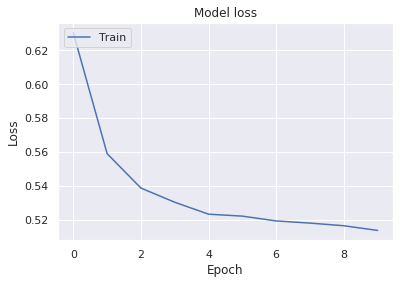

In [81]:
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.show()

In [82]:
y_pred = model.predict(X_test, verbose = 0)

In [83]:
Y_test_predicted_values = get_predicted_values(y_pred)
Y_test_values = get_predicted_values(y_test)
print(Y_test_predicted_values[1:10])
print(Y_test_values[1:10])

false_positives = []
false_negatives = []
for i in range(len(Y_test_values)):
    if Y_test_values[i] == 0 and Y_test_predicted_values[i] == 1:
        false_positives.append(i)
    elif Y_test_values[i] == 1 and Y_test_predicted_values[i] == 0:
        false_negatives.append(i)
        
print("False Positive Rate: {:.2f}".format(len(false_positives)/len(Y_test_values)))
print("False Negative Rate: {:.2f}".format(len(false_negatives)/len(Y_test_values)))

[1, 0, 1, 1, 1, 1, 0, 0, 1]
[0, 1, 1, 1, 1, 0, 0, 0, 1]
False Positive Rate: 0.11
False Negative Rate: 0.14


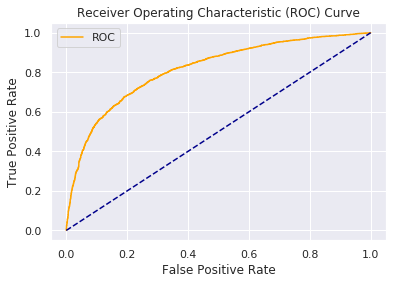

In [84]:
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:, 1]
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
auc = roc_auc_score(y_ROC, y_pred)
fpr, tpr, thresholds = roc_curve(y_ROC, y_pred)
plot_roc_curve(fpr, tpr)

# SCIKIT LEARN

## SGD

In [85]:
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

In [86]:
X = pd.DataFrame(full_data).drop("class", axis =1)
y = full_data["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [87]:
model = SGDClassifier(loss="log", max_iter=2000, tol=1e-3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.74      0.64      0.69      3401
           1       0.68      0.77      0.72      3378

    accuracy                           0.71      6779
   macro avg       0.71      0.71      0.71      6779
weighted avg       0.71      0.71      0.71      6779



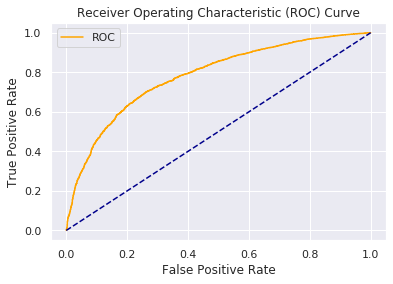

In [88]:
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:, 1]
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

## DecisionTree

In [89]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

precision    recall  f1-score   support

           0       0.64      0.61      0.63      3401
           1       0.63      0.66      0.64      3378

    accuracy                           0.64      6779
   macro avg       0.64      0.64      0.64      6779
weighted avg       0.64      0.64      0.64      6779



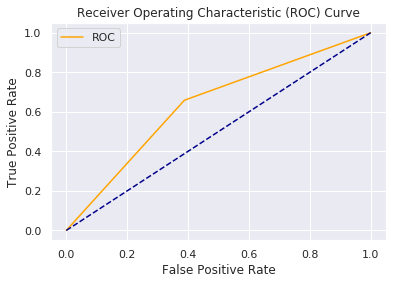

In [90]:
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:, 1]
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

## KNN

In [91]:
model = KNeighborsClassifier(n_neighbors = 2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))    

precision    recall  f1-score   support

           0       0.62      0.76      0.68      3401
           1       0.68      0.53      0.59      3378

    accuracy                           0.64      6779
   macro avg       0.65      0.64      0.64      6779
weighted avg       0.65      0.64      0.64      6779



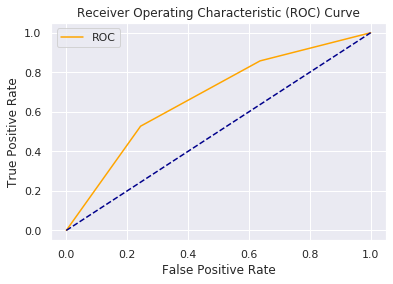

In [92]:
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:, 1]
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

## LogisticClassifier

In [93]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))    

precision    recall  f1-score   support

           0       0.73      0.68      0.70      3401
           1       0.70      0.75      0.72      3378

    accuracy                           0.71      6779
   macro avg       0.71      0.71      0.71      6779
weighted avg       0.71      0.71      0.71      6779

/home/donghi/anaconda3/envs/ambDanielFiep/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [97]:
y_pred = model.predict_proba(X_test)
y_pred = y_pred[:, 1]
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()
auc = roc_auc_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plot_roc_curve(fpr, tpr)

[[0.66896384 0.33103616]
 [0.66508841 0.33491159]
 [0.67021073 0.32978927]
 ...
 [0.17606481 0.82393519]
 [0.21774112 0.78225888]
 [0.24128773 0.75871227]]
